# Import

In [1]:
import ccxt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans

# Give the coins historical data

In [2]:
#coins = "BTC", "ETH", "BNB", "XRP", "ADA", "DOGE", "SOL", "MATIC", "TRX", "LTC", "DOT", "AVAX", "SHIB", "UNI", "ATOM", "LINK", "XMR", "ETC", "BCH", "ICP", "FIL", "XLM", "HBAR", "VET", "SAND", "QNT", "MANA", "ALGO", "EGLD", "AAVE"

In [3]:
coins = "BTC", "ETH", "DOGE", "TRX", "BNB", "MATIC", "FTM", "SHIB", "SOL", 

In [4]:
coins = "BTC", "ETH", "DOGE", "LTC", "XRP", "TRX", "ADA", "BNB", "MATIC", "FTM", "SHIB", "SOL", 

In [5]:
binance = ccxt.binance()
timeframe = '1d'  

In [6]:
def get_data(coin, base, timeframe):
    df = binance.fetch_ohlcv(f'{coin}/{base}', timeframe, limit=500)
    df = pd.DataFrame(df, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df.set_index('Timestamp', inplace=True)
    return df

In [7]:
data = {}
for coin in coins:    
    data[coin] = get_data(coin, "USDT", timeframe)    

# Price Percentage Change

In [8]:
def calculate_percentage_change(prices):
    return [(prices[i] - prices[i-1]) / prices[i-1] * 100 for i in range(1, len(prices))]

changes = {}
for coin in data:
    changes[coin] = calculate_percentage_change(data[coin]["Close"])

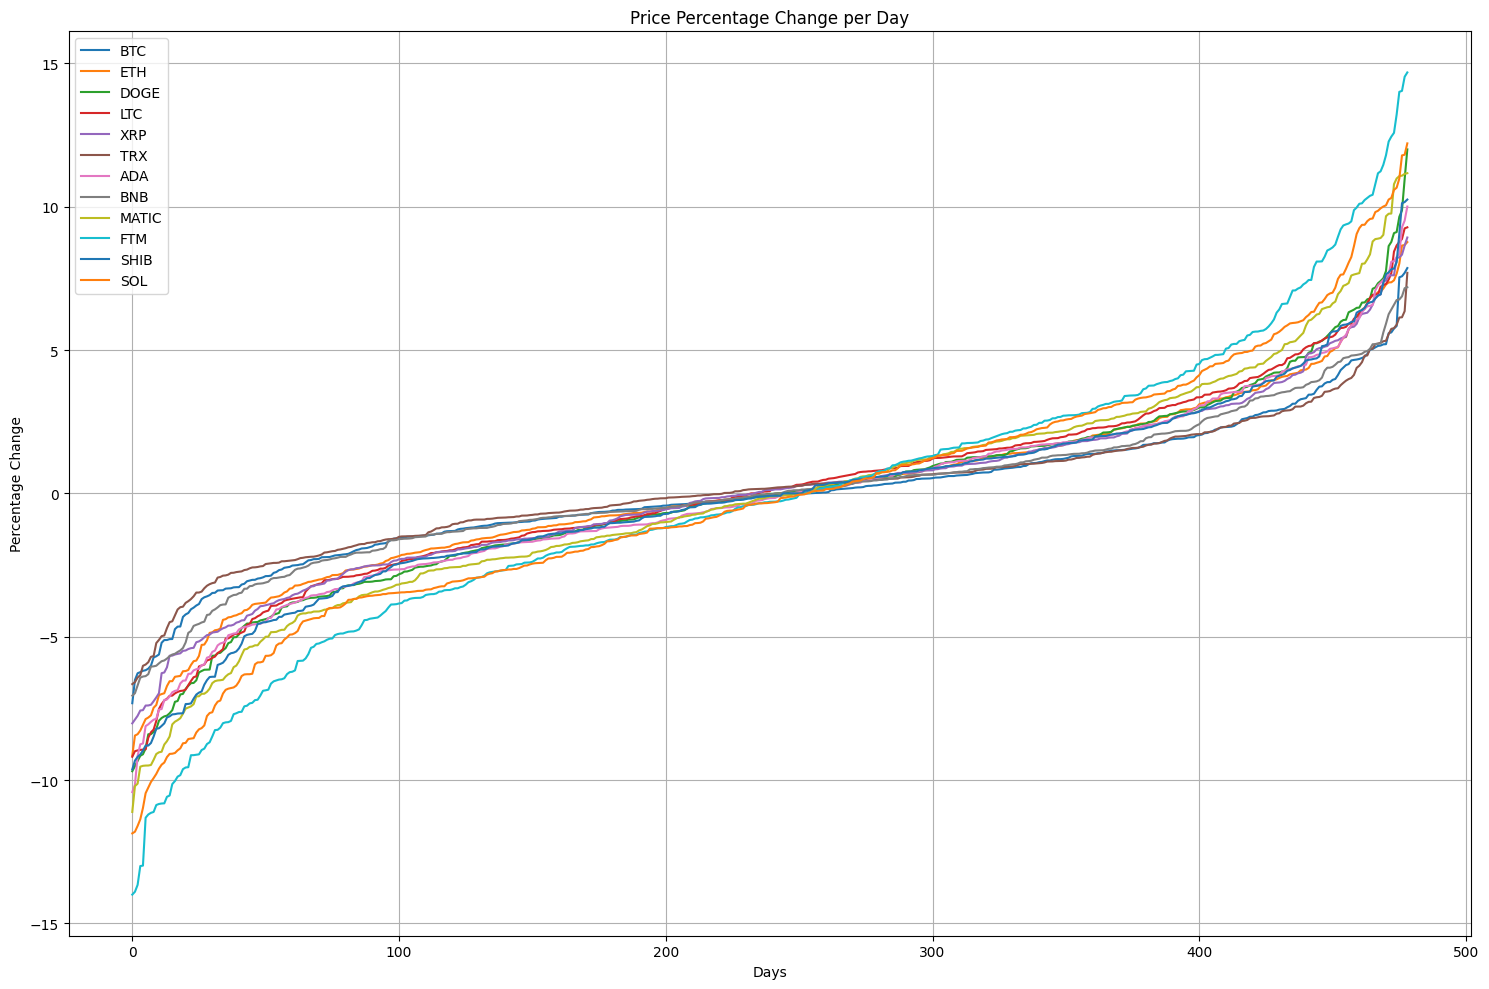

In [9]:
plt.figure(figsize=(15, 10))
for coin in changes:
    change = sorted(changes[coin])
    change = change[10:-10] # remove 10 outlayers from each side
    plt.plot(change, label= coin)
plt.legend()
plt.title("Price Percentage Change per Day")
plt.xlabel("Days")
plt.ylabel("Percentage Change")
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()


# Average True Range (ATR)

In [10]:
def calculate_atr_percentage(high_prices, low_prices, close_prices, period=14):
    true_ranges = []
    for i in range(1, len(high_prices)):
        high_minus_low = high_prices[i] - low_prices[i]
        high_minus_previous_close = abs(high_prices[i] - close_prices[i-1])
        low_minus_previous_close = abs(low_prices[i] - close_prices[i-1])
        true_range = max(high_minus_low, high_minus_previous_close, low_minus_previous_close)
        true_ranges.append(true_range)
    
    atr = np.mean(true_ranges[-period:])
    atr_percentage = (atr / close_prices[-1]) * 100  # ATR as a percentage of the current price
    return atr_percentage

In [11]:
atr_values = {}
for coin in data:
    atr_values[coin] = calculate_atr_percentage(data[coin]["Low"], data[coin]["High"], data[coin]["Close"])

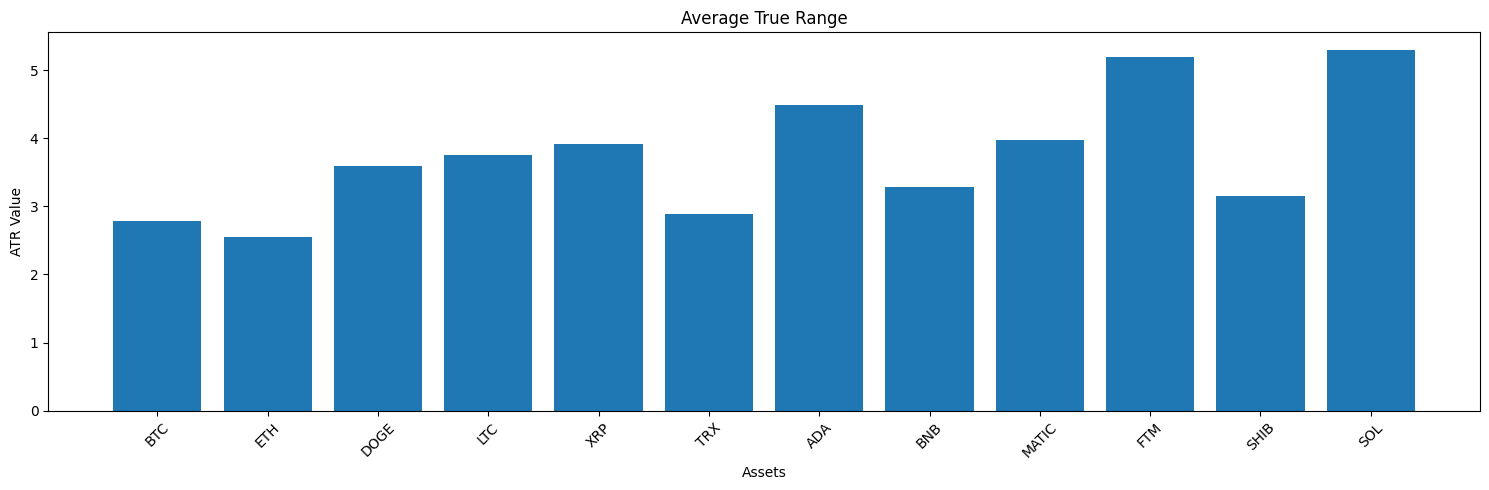

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(atr_values.keys(), atr_values.values())

plt.title("Average True Range")
plt.xlabel("Assets")
plt.ylabel("ATR Value")

plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting the spacing of the plot elements to prevent overlapping

plt.show()